In [ ]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
pop_size = 50
pop_dim= 20
generation_size = 500
u1 = np.array([[np.random.uniform(0,1) for i in range(pop_dim)]  for i in range(pop_size)])
u2 = np.array([[np.random.uniform(0,1) for i in range(pop_dim)] for i in range(pop_size)])

sns.set(style='darkgrid')
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (12,6)

# Adaptive Evolution Strategy with 1/5 success rule

##Functions

In [ ]:
def initial (population,sigma):
  for i in range(pop_size):
    s = np.random.uniform(-500,500,pop_dim)
    sig = np.random.normal(0,1,pop_dim)
    population.append(s)
    sigma.append(sig)
  return population,sigma

def Schwefel (x):
  n = len(x)
  f = 418.9829*n
  for tmp in x:
    if tmp < -500 or tmp > 500:
      f += 0.02*np.power(tmp, 2)
    else:
      f += -tmp * np.sin(np.sqrt(np.abs(tmp)))
  return f

def fitness_Schwefel (population):
  fitness=[]
  for chromosome in population:
    fitness.append(Schwefel(chromosome))
  return fitness

def selectparent (population,sigma):
  parent=[]
  p_sigma=[]
  pindex=np.random.randint(pop_size)
  parent=population[pindex]
  p_sigma=sigma[pindex]
  return parent,p_sigma

def recom_discrete (parent1,parent2,p_sigma1,p_sigma2):
  child=ones(pop_dim)
  sig=ones(pop_dim)
  for i in range(pop_dim):
    if (np.random.rand()<0.5):
      child[i]=parent1[i]
      sig[i]=p_sigma1[i]
    else:
      child[i]=parent2[i]
      sig[i]=p_sigma2[i]
  return child,sig

def recom_intermediate (parent1,parent2,p_sigma1,p_sigma2):
  child=ones(pop_dim)
  sig=ones(pop_dim)
  for i in range(pop_dim):
    child[i]=(parent1[i]+parent2[i])/2
    sig[i]=(p_sigma1[i]+p_sigma2[i])/2
  return child,sig

def creatstep(sigma,count):
  s=np.array(sigma)
  n_sigma=[]
  if (count/len(sigma)) > 0.2:
    n_sigma = s/0.9
  elif (count/len(sigma)) < 0.2:
    n_sigma = s*0.9
  elif (count/len(sigma)) == 0.2:
    n_sigma = s
  return n_sigma.tolist()

def mutation(children,sigma):
  c = len(children)
  for i in range(len(children)):
    for j in range(pop_dim):
      rnChild = np.random.normal(0,1)
      children[i][j] = children[i][j] + (sigma[i][j]*rnChild)
  return children

def survive_select(candid_pop , candid_sigma , candid_fit ):
  condid = np.column_stack((candid_pop,candid_sigma,candid_fit))
  sorted_c = condid[ condid[:, -1].argsort()]
  selected_pop= sorted_c[ 0:pop_size , 0:pop_dim]
  selected_sig= sorted_c[ 0:pop_size , pop_dim:2*pop_dim]
  selected_fit= sorted_c[ 0:pop_size , -1]
  return selected_pop.tolist() , selected_sig.tolist() , selected_fit.tolist()


##ES with discrete recombination and MU + LAMBDA

Generation: 1 6674.657367347957
Generation: 2 6432.114233607933
Generation: 3 5819.640936872183
Generation: 4 5597.915066892348
Generation: 5 4617.7764845728825
Generation: 6 4612.3344175099355
Generation: 7 3997.544644392597
Generation: 8 3997.544644392597
Generation: 9 3786.5260148505454
Generation: 10 2985.077537405359
Generation: 11 2847.2253353223296
Generation: 12 2767.038095674699
Generation: 13 2390.692522087458
Generation: 14 2153.9992977867273
Generation: 15 1823.6250095787962
Generation: 16 1823.6250095787962
Generation: 17 1513.4315401332526
Generation: 18 1424.673897363827
Generation: 19 1384.2982394366084
Generation: 20 1314.5056219878338
Generation: 21 1147.9815361231665
Generation: 22 1147.9815361231665
Generation: 23 1082.685712296581
Generation: 24 1063.5422354880657
Generation: 25 1059.1282071728742
Generation: 26 1038.6703591558714
Generation: 27 1038.6703591558714
Generation: 28 1038.6703591558714
Generation: 29 1036.7890100213115
Generation: 30 1032.3835813659427


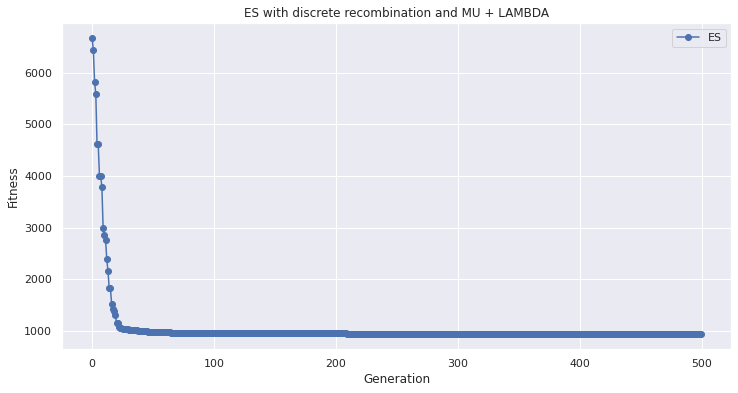

In [ ]:
def main():
  global list1_best_fitness1
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_Schwefel(Population)
  children = []
  c_sigma = []
  list1_best_fitness1=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_discrete(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_Schwefel(children)
    f_child = fitness_Schwefel(n_children)
    Count=0
    for i in range(pop_size):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(Population + n_children)
    candid_sigma = np.array(sigma + n_sigma)
    candid_fit =np.array(f + f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness1.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness1[-1])

  plt.plot(list1_best_fitness1, 'b-o', label="ES")

  plt.title("ES with discrete recombination and MU + LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()

main()

##ES with intermediate recombination and MU + LAMBDA

Generation: 1 6459.809214020355
Generation: 2 6459.809214020355
Generation: 3 6459.809214020355
Generation: 4 6459.809214020355
Generation: 5 6459.809214020355
Generation: 6 6459.809214020355
Generation: 7 6459.809214020355
Generation: 8 6459.809214020355
Generation: 9 6459.809214020355
Generation: 10 6459.809214020355
Generation: 11 6455.5441670927075
Generation: 12 6439.631075816469
Generation: 13 6439.631075816469
Generation: 14 6427.895265595236
Generation: 15 6403.688581081238
Generation: 16 6384.693943053549
Generation: 17 6384.693943053549
Generation: 18 6380.601512678225
Generation: 19 6364.302593721801
Generation: 20 6361.484313429987
Generation: 21 6356.43018640075
Generation: 22 6349.705333624783
Generation: 23 6344.974956234918
Generation: 24 6328.733659658078
Generation: 25 6326.105756938574
Generation: 26 6324.399721082484
Generation: 27 6315.892109832919
Generation: 28 6309.100216063332
Generation: 29 6298.571146186396
Generation: 30 6290.702543038944
Generation: 31 6290

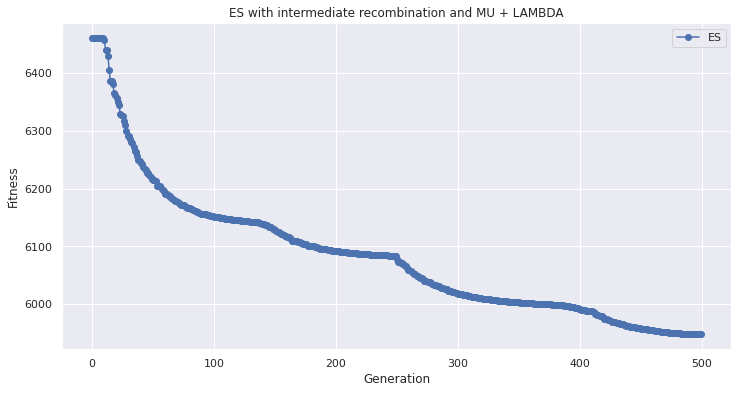

In [ ]:
def main():
  global list1_best_fitness2
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_Schwefel(Population)
  children = []
  c_sigma = []
  list1_best_fitness2=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_intermediate(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_Schwefel(children)
    f_child = fitness_Schwefel(n_children)
    Count=0
    for i in range(pop_size):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(Population + n_children)
    candid_sigma = np.array(sigma + n_sigma)
    candid_fit =np.array(f + f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness2.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness2[-1])

  plt.plot(list1_best_fitness2, 'b-o', label="ES")

  plt.title("ES with intermediate recombination and MU + LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()
main()

##ES with discrete recombination and MU & LAMBDA

Generation: 1 6115.86392176676
Generation: 2 5144.0694948906885
Generation: 3 4825.032254661341
Generation: 4 4163.3644956484795
Generation: 5 3720.5421754696195
Generation: 6 2857.72866452628
Generation: 7 2353.976245182964
Generation: 8 2152.9745933276863
Generation: 9 1743.371326939739
Generation: 10 1594.8512426560067
Generation: 11 1375.642424880723
Generation: 12 1336.6063079803894
Generation: 13 1169.5688905807403
Generation: 14 1024.6945031293053
Generation: 15 1030.2279526168186
Generation: 16 1008.4409275386819
Generation: 17 998.8945488630188
Generation: 18 986.1594993945104
Generation: 19 978.9390006988367
Generation: 20 964.5274436381842
Generation: 21 956.5716795870695
Generation: 22 948.1254155464306
Generation: 23 944.4741918145348
Generation: 24 940.6660479317644
Generation: 25 936.5619825098651
Generation: 26 932.9788844593592
Generation: 27 931.0790306434865
Generation: 28 927.5232303824685
Generation: 29 923.5670039415683
Generation: 30 922.4515175486852
Generation:

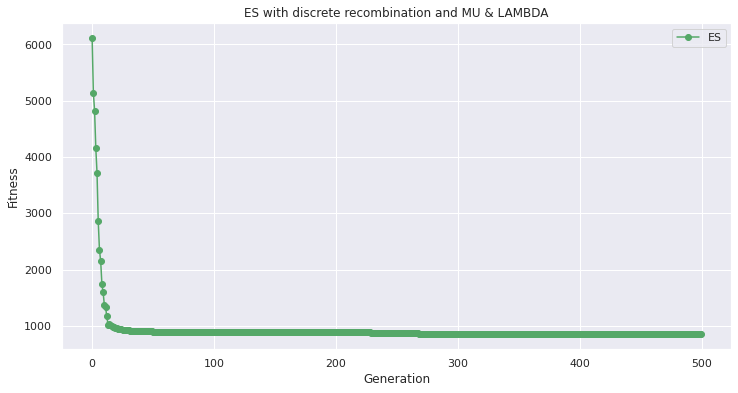

In [ ]:
def main():
  global list1_best_fitness3
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_Schwefel(Population)
  children = []
  c_sigma = []
  list1_best_fitness3=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size*3):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_discrete(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_Schwefel(children)
    f_child = fitness_Schwefel(n_children)
    Count=0
    for i in range(pop_size*3):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(n_children)
    candid_sigma = np.array(n_sigma)
    candid_fit =np.array(f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness3.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness3[-1])

  plt.plot(list1_best_fitness3, 'g-o', label="ES")

  plt.title("ES with discrete recombination and MU & LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()
  
main()

##ES with intermediate recombination and MU & LAMBDA

Generation: 1 6913.35985781323
Generation: 2 6900.779689183022
Generation: 3 6905.019974298382
Generation: 4 6897.467207289659
Generation: 5 6892.105448405164
Generation: 6 6900.197419935316
Generation: 7 6890.159353202663
Generation: 8 6801.649014931554
Generation: 9 6801.611507429678
Generation: 10 6802.6572948565845
Generation: 11 6810.475135122291
Generation: 12 6805.117830217496
Generation: 13 6798.291131304358
Generation: 14 6789.314780054126
Generation: 15 6789.564684664881
Generation: 16 6788.778718237028
Generation: 17 6774.82277215021
Generation: 18 6766.325857016987
Generation: 19 6758.452417805258
Generation: 20 6747.999091799593
Generation: 21 6740.1801628565
Generation: 22 6737.500300338972
Generation: 23 6722.480329337957
Generation: 24 6714.005386870323
Generation: 25 6709.47503797196
Generation: 26 6705.936831178954
Generation: 27 6703.421745411572
Generation: 28 6696.609879618271
Generation: 29 6692.97973722087
Generation: 30 6689.385964193898
Generation: 31 6685.5037

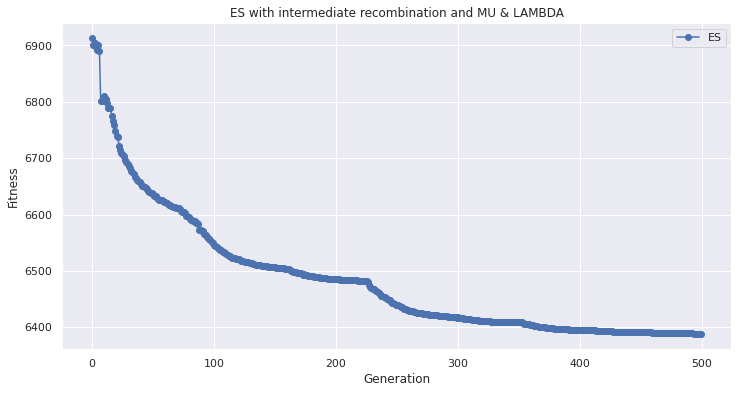

In [ ]:
def main():
  global list1_best_fitness4
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_Schwefel(Population)
  children = []
  c_sigma = []
  list1_best_fitness4=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size*3):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_intermediate(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_Schwefel(children)
    f_child = fitness_Schwefel(n_children)
    Count=0
    for i in range(pop_size*3):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(n_children)
    candid_sigma = np.array(n_sigma)
    candid_fit =np.array(f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness4.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness4[-1])

  plt.plot(list1_best_fitness4, 'b-o', label="ES")

  plt.title("ES with intermediate recombination and MU & LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()
  
main()

##Compare PLOT

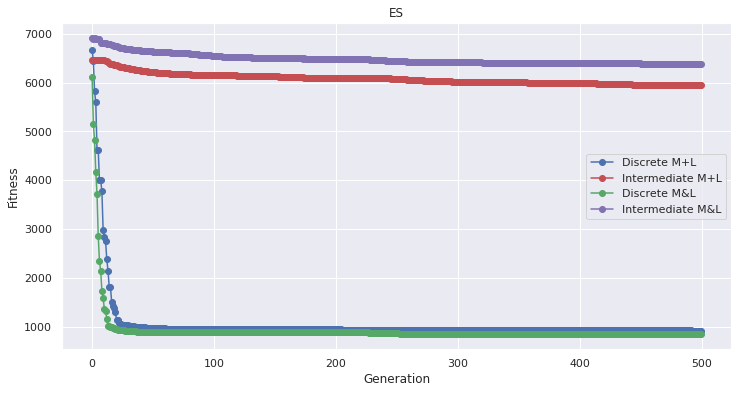

In [ ]:
plt.plot(list1_best_fitness1, 'b-o', label="Discrete M+L")
plt.plot(list1_best_fitness2, 'r-o', label="Intermediate M+L")
plt.plot(list1_best_fitness3, 'g-o', label="Discrete M&L")
plt.plot(list1_best_fitness4, 'm-o', label="Intermediate M&L")

plt.title("ES")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.show()

#Particle Swarm Optimisation

##Functions

In [ ]:
def initial_population(population_size, dim):
    bests = []
    population = []
    for i in range(population_size):
        chromosome = np.random.uniform(-500,500,dim)
        population.append(chromosome)
        bests.append(chromosome)
    population = np.array(population)
    bests = np.array(bests)
    best_f, best_gen = find_best_answer(population, dim)
    velocity = np.array(phi1*np.multiply(u1, bests - population) + phi2*np.multiply(u2, best_gen - population))
    bests = population
    return population, velocity, bests

def find_best_answer(population, dim=pop_dim):
    fitnesses = np.array([Schwefel(x) for x in population])

    all = np.concatenate((population, fitnesses[:, None]), axis=1)
    all = np.array(sorted(all, key=lambda x: x[dim]))
    min_value = all[0,dim]
    genome = all[0,0:dim]
    return min_value, genome

def mutation(children, velocity, bests):
    new_children = []
    f, best_in_pop = find_best_answer(children)
    for i in range(pop_size):
        velocity[i] = w*velocity[i] + phi1*np.multiply(u1[i], (bests[i] - children[i])) + phi2*np.multiply(u2[i], (best_in_pop - children[i]))
        mutate_c = children[i] + velocity[i]
        if Schwefel(mutate_c) < Schwefel(children[i]):
            bests[i] = mutate_c
        new_children.append(mutate_c)
    new_children = np.array(new_children)
    return new_children, velocity, bests

##Test algorithm with W = 0.2

generation  1 6024.146569350059
generation  2 6024.146569350059
generation  3 6024.146569350059
generation  4 6024.146569350059
generation  5 6024.146569350059
generation  6 5936.56259068959
generation  7 5996.518207529663
generation  8 5919.798904318951
generation  9 5952.863105498446
generation  10 5969.928626923317
generation  11 5973.724846532407
generation  12 5970.8634381355
generation  13 5970.515980099255
generation  14 5970.454190414557
generation  15 5970.442133838208
generation  16 5970.439734527144
generation  17 5970.439255144697
generation  18 5970.439159287403
generation  19 5970.439140116708
generation  20 5970.439136282599
generation  21 5970.439135515779
generation  22 5970.439135362412
generation  23 5948.354589241468
generation  24 5940.832743243917
generation  25 5939.330064961952
generation  26 5947.207621714254
generation  27 5922.514773446981
generation  28 5896.0965268759255
generation  29 5846.740550450771
generation  30 5826.853861199285
generation  31 5731.6

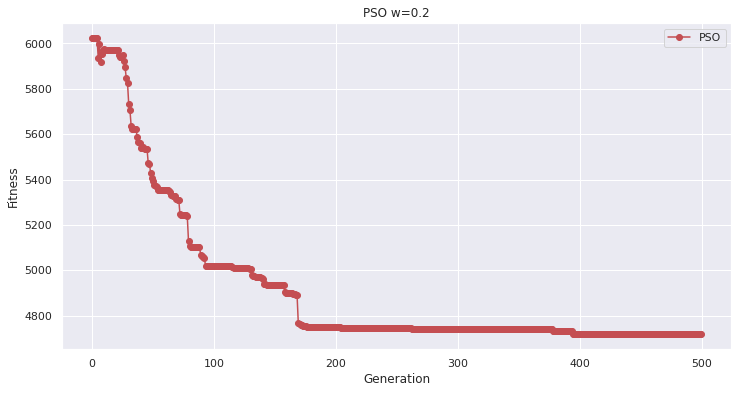

In [ ]:
w=0.2
phi1=0.7
phi2=0.4

def main():
    global list2_best_fitness1
    generation = 0
    list2_best_fitness1 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness1.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness1, 'r-o', label="PSO")

    plt.title("PSO w=0.2")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Test algorithm with W = 0.4

generation  1 5754.46513822911
generation  2 5754.46513822911
generation  3 5754.46513822911
generation  4 5754.46513822911
generation  5 5754.46513822911
generation  6 5754.46513822911
generation  7 5136.203691447268
generation  8 4655.713853543069
generation  9 4962.605690260942
generation  10 4755.242072663804
generation  11 4760.944426864884
generation  12 4794.316960908451
generation  13 4766.812662060248
generation  14 4529.162359410436
generation  15 4553.942181578494
generation  16 4555.9342966604245
generation  17 4538.04769234973
generation  18 4534.306526581555
generation  19 4533.366059724259
generation  20 4533.079122912994
generation  21 4532.978637749279
generation  22 4530.961067636943
generation  23 4504.367126322496
generation  24 4493.780769676751
generation  25 4489.555948150252
generation  26 4487.867672175099
generation  27 4487.192632419288
generation  28 4486.922660215736
generation  29 4486.8146783515385
generation  30 4486.771486730239
generation  31 4486.7542

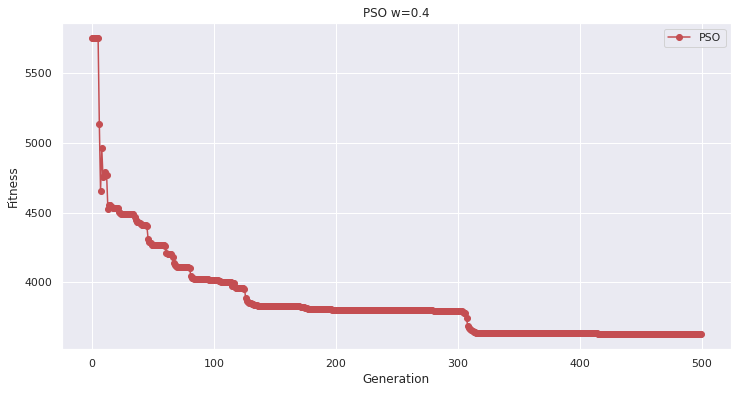

In [ ]:
w=0.4
phi1=0.7
phi2=0.4

def main():
    global list2_best_fitness2
    generation = 0
    list2_best_fitness2 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness2.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness2, 'r-o', label="PSO")

    plt.title("PSO w=0.4")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Test algorithm with W = 0.6

generation  1 6407.854974990154
generation  2 6397.824693657073
generation  3 6371.385891432679
generation  4 6311.436665049539
generation  5 6348.377243373577
generation  6 6371.296155809214
generation  7 6081.470598437457
generation  8 6094.256574257404
generation  9 6141.558523294586
generation  10 6161.274704373784
generation  11 6165.777012174148
generation  12 5989.972269070923
generation  13 5734.98524197183
generation  14 5604.640503711018
generation  15 5568.213995735876
generation  16 5556.308414695917
generation  17 5551.982041931238
generation  18 5550.321840197748
generation  19 5549.66905434656
generation  20 5403.728642548279
generation  21 5351.757446679221
generation  22 5334.252022444988
generation  23 5327.820394458962
generation  24 5325.341657190758
generation  25 5324.365349351385
generation  26 5323.977266249394
generation  27 5323.822424055662
generation  28 5323.760549786638
generation  29 5323.735810098999
generation  30 5297.317324409179
generation  31 5280.3

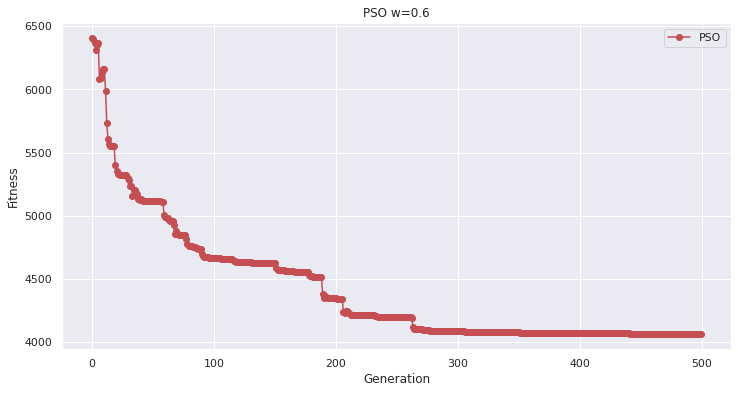

In [ ]:
W=0.6
phi1=0.1
phi2=0.3

def main():
    global list2_best_fitness3
    generation = 0
    list2_best_fitness3 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness3.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness3, 'r-o', label="PSO")

    plt.title("PSO w=0.6")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Test algorithm with W = 0.8

generation  1 6716.067879152405
generation  2 6716.067879152405
generation  3 6442.779958908137
generation  4 6877.888587560654
generation  5 6615.301770736643
generation  6 6591.768585245477
generation  7 6510.961982764389
generation  8 6416.4462445214895
generation  9 6402.312979638601
generation  10 6485.187429975731
generation  11 6567.390432458986
generation  12 5701.170172475521
generation  13 5595.855022379384
generation  14 5348.794252329005
generation  15 5337.882387769599
generation  16 5024.160864879629
generation  17 5081.567502137441
generation  18 5086.848643794126
generation  19 4841.599583131524
generation  20 4702.508063707526
generation  21 4864.9334518841215
generation  22 4261.0798303870215
generation  23 4536.353133081714
generation  24 4449.245346611837
generation  25 4383.0689382713945
generation  26 4092.7527439174382
generation  27 3955.8889746233594
generation  28 3957.481773600717
generation  29 3860.2710874341565
generation  30 3724.600801587547
generation  

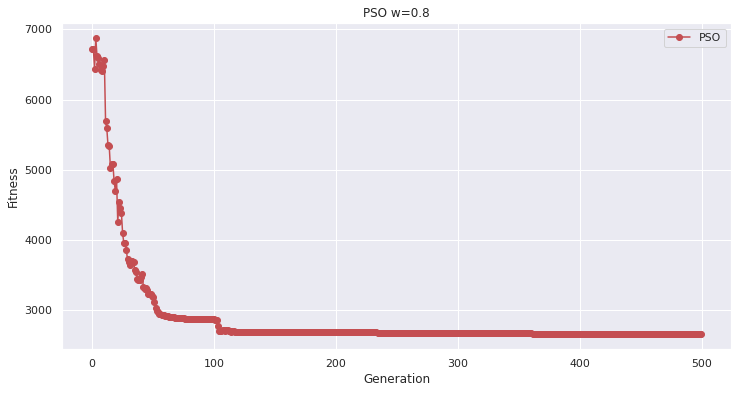

In [ ]:
w=0.8
phi1=0.1
phi2=0.3

def main():
    global list2_best_fitness4
    generation = 0
    list2_best_fitness4 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness4.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness4, 'r-o', label="PSO")

    plt.title("PSO w=0.8")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Compare PLOT

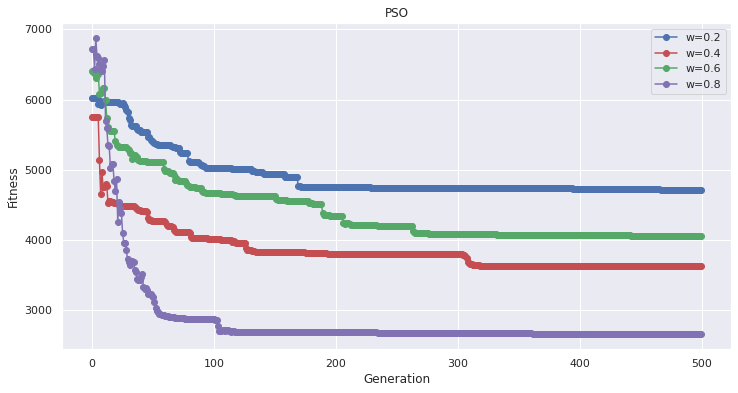

In [ ]:
plt.plot(list2_best_fitness1, 'b-o', label="w=0.2")
plt.plot(list2_best_fitness2, 'r-o', label="w=0.4")
plt.plot(list2_best_fitness3, 'g-o', label="w=0.6")
plt.plot(list2_best_fitness4, 'm-o', label="w=0.8")

plt.title("PSO")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.show()

#Differential Evolution

##Functions

In [ ]:
def initial_population(population_size, dim):
    population = []
    for i in range(population_size):
        chromosome = np.random.uniform(-500,500,dim)
        population.append(chromosome)
    return population

def find_best_answer(population, dim):
    fitnesses = np.array([Schwefel(x) for x in population])

    all = np.concatenate((population, fitnesses[:, None]), axis=1)
    all = np.array(sorted(all, key=lambda x: x[dim]))
    min_value = all[0,dim]
    genome = all[0,0:dim]
    return min_value, genome

def mutation(children):
    new_children = []
    F = 0.2
    for i in range(len(children)):
        indexes = [np.random.randint(0, len(children)) for i in range(3)]
        new_x = children[indexes[0]] + F * (children[indexes[1]] - children[indexes[2]])
        new_children.append(new_x)
        new_children.append(children[i])

    new_children = np.array(new_children)
    return new_children

def crossover(population, population_size, dim):
    children = []
    incriminator = 0
    while incriminator < population_size:
        parent1 = population[incriminator]
        incriminator += 1
        parent2 = population[incriminator]
        incriminator += 1
        r = np.random.randint(0, dim)
        tmp = np.concatenate((parent1[0:r],parent2[r:dim]), axis=0)
        tp = np.concatenate((parent2[0:r],parent1[r:dim]), axis=0)
        children.append(tmp)
        children.append(tp)

    children = np.array(children)

    return children

def generate_new_population(population, new_pop):
    increminator = 0
    survived_population = []
    while increminator < len(new_pop):
        genome1 = new_pop[increminator]
        increminator += 1
        genome2 = new_pop[increminator]
        increminator += 1
        if Schwefel(genome1) < Schwefel(genome2):
            survived_population.append(genome1)
        else:
            survived_population.append(genome2)
    survived_population = np.array(survived_population)
    return survived_population

def find_best_answer(population, dim):
    fitnesses = np.array([Schwefel(x) for x in population])
    all = np.concatenate((population, fitnesses[:, None]), axis=1)
    all = np.array(sorted(all, key=lambda x: x[dim]))
    min_value = all[0,dim]
    genome = all[0,0:dim]
    return min_value, genome

##Algorithm

generation :  1 5552.452808641107
generation :  2 5771.350289391815
generation :  3 7036.7938947166695
generation :  4 6832.837754420969
generation :  5 6216.154053137183
generation :  6 6597.427716804297
generation :  7 6985.812153489152
generation :  8 6808.465651292417
generation :  9 6507.629136949827
generation :  10 6639.664724238167
generation :  11 6421.051284000688
generation :  12 6509.215580292612
generation :  13 6616.448122522168
generation :  14 6523.552606167506
generation :  15 6030.933642504671
generation :  16 6671.2690815814
generation :  17 6531.439687666111
generation :  18 6570.169079524881
generation :  19 6749.9311205505355
generation :  20 6246.621789045451
generation :  21 6183.082573599107
generation :  22 6160.447223860729
generation :  23 5889.709689736592
generation :  24 5778.156152794498
generation :  25 5780.372484603506
generation :  26 5153.978297291976
generation :  27 5549.8292990312075
generation :  28 5401.286093530992
generation :  29 5432.895741

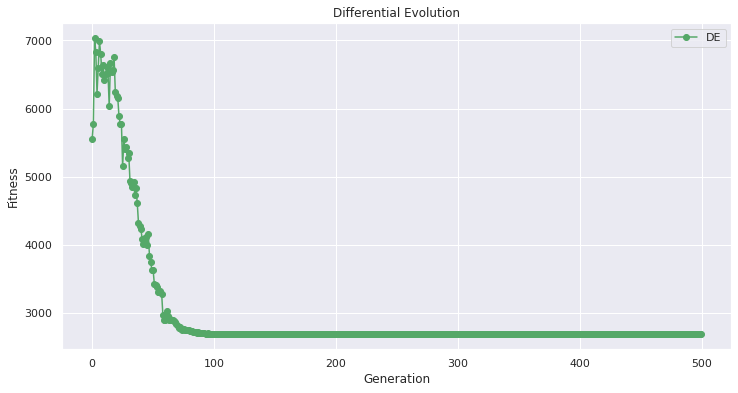

In [ ]:
def main():
    global list3_best_fitness
    list3_best_fitness = []
    generation = 0

    population = initial_population(pop_size, pop_dim)

    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list3_best_fitness.append(a)
        print('generation : ', generation+1, a)

        children = mutation(population)
        children = crossover(children, pop_size, pop_dim)
        population = generate_new_population(population, children)
        generation += 1

    plt.plot(list3_best_fitness, 'g-o', label="DE")

    plt.title("Differential Evolution")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

#Compare algorithms

In [ ]:
print("ES fitnesses: ")
print("\tES with discrete recombination and MU + LAMBDA: ",list1_best_fitness1[-1], 
      "\n\tES with intermediate recombination and MU + LAMBDA: ",list1_best_fitness2[-1], 
      "\n\tES with discrete recombination and MU & LAMBDA: ",list1_best_fitness3[-1], 
      "\n\tES with intermediate recombination and MU & LAMBDA: ",list1_best_fitness4[-1])

print("\nPSO fitnesses: ")
print("\tPSO w=0.2: ",list2_best_fitness1[-1], 
      "\n\tPSO w=0.4: ",list2_best_fitness2[-1], 
      "\n\tPSO w=0.6: ",list2_best_fitness3[-1], 
      "\n\tPSO w=0.8: ",list2_best_fitness4[-1])

print("\nDE fitnesses: ")
print("\tDE: ",list3_best_fitness[-1])

ES fitnesses: 
	ES with discrete recombination and MU + LAMBDA:  928.7509542030087 
	ES with intermediate recombination and MU + LAMBDA:  5948.1294006802345 
	ES with discrete recombination and MU & LAMBDA:  847.5669302865726 
	ES with intermediate recombination and MU & LAMBDA:  6387.201622988248

PSO fitnesses: 
	PSO w=0.2:  4717.849870570928 
	PSO w=0.4:  3624.1053230143343 
	PSO w=0.6:  4060.045517901097 
	PSO w=0.8:  2652.9387551731243

DE fitnesses: 
	DE:  2681.606373792916


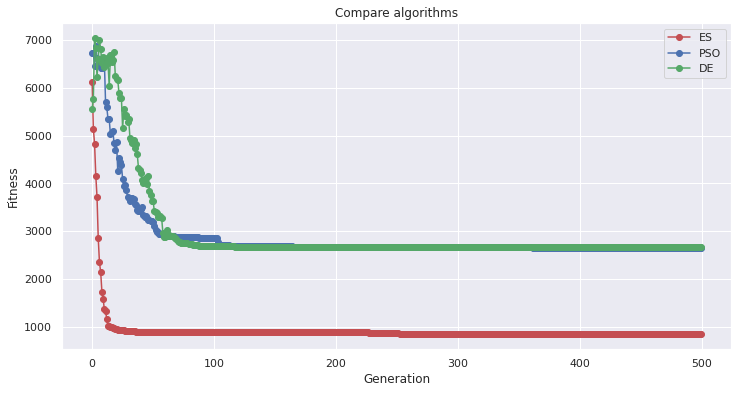

In [ ]:
plt.plot(list1_best_fitness3, 'r-o', label="ES")
plt.plot(list2_best_fitness4, 'b-o', label="PSO")
plt.plot(list3_best_fitness, 'g-o', label="DE")

plt.title("Compare algorithms")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()